<div class="span5 alert alert-success">
<p> This workbook runs a Lasso Regression for various windfarm machine learning datasets </p>
</div>

<div class="span5 alert alert-success">
<p> Prep </p>
</div>

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MachineLearningData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject1Downloads\MachineLearningData


In [57]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [58]:
#Function to build the model
def BuildAndFitModel(model_type, df, x, y):
    array = df.values
    X = array[:,0:x]
    Y = array[:,y]
    kfold = KFold(n_splits=5, random_state=7)
    model = model_type
    
    model.fit(X,Y)
    model_score = model.score(X,Y)
    
    print('model score: ' + str(model_score))
    
    scoring = 'neg_mean_squared_error'
    model_cv_scores = cross_val_score(model, X, Y, cv = kfold, scoring=scoring)
    print('model score with cross validation: ' + str(model_cv_scores))
    
    print('model score with cross validation mean: ' + str(model_cv_scores.mean()))
    
    lasso_coef = lasso.coef_
    
    return [model_score, model_cv_scores,lasso_coef]

In [59]:
#Function to plot coefficients
def PlotCoefficients(featurescount, model,title):
    plt.plot(range(0,featurescount), model)
    plt.xticks(range(0,featurescount), xlabels, rotation=60)
    plt.margins(0.02)
    plt.title('Correlation Coefficients for ' + str(title))
    
    return plt

<div class="span5 alert alert-success">
<p> Using zip codes (count: 21) with 2009 - 2017 housing data available </p>
</div>

In [60]:
dfin = pd.read_csv('project1_machine_learning_input_starting_2009.csv')

df = dfin[['pop_density','med_household_income','Has_Windfarm', 'percent_higher_ed',
              'percent_2010_change','percent_2011_change','percent_2012_change',
              'percent_2013_change','percent_2014_change','percent_2015_change','percent_2016_change',
              'percent_2017_change','percent_2018_change']]

lasso = Lasso()
#lasso = Lasso(alpha=0.4, normalize=True)

print('Model 2009 Results')
model2009 = BuildAndFitModel(lasso, df, 12, 12)

Model 2009 Results
model score: 0.029795183478338205
model score with cross validation: [-0.01221435 -0.00437783 -0.0021052  -0.00442849 -0.00481776]
model score with cross validation mean: -0.005588725060206759


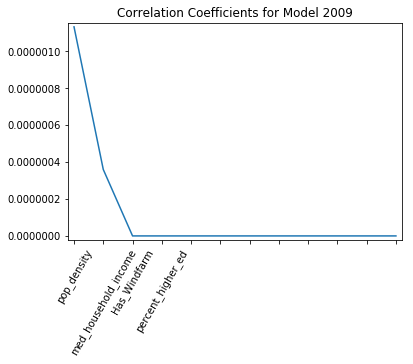

In [61]:
#Plot the coefficients to see which features have highest value
coef_values = model2009[2]
featurescount = len(df.columns) - 1
title = 'Model 2009'

plt = PlotCoefficients(featurescount, coef_values,title)

<div class="span5 alert alert-success">
<p> Using zip codes (count: 48) with 2014 - 2017 housing data available </p>
</div>

In [62]:
dfin = pd.read_csv('project1_machine_learning_input_starting_2014.csv')

df = dfin[['pop_density','med_household_income','Has_Windfarm', 'percent_higher_ed',
           'percent_2015_change','percent_2016_change',
           'percent_2017_change','percent_2018_change']]

print('Model 2014 Results')
model2014 = BuildAndFitModel(lasso, df, 7, 7)

Model 2014 Results
model score: 0.02796318303035727
model score with cross validation: [-0.01300961 -0.00268227 -0.00549396 -0.01062491 -0.00677944]
model score with cross validation mean: -0.007718039478604608


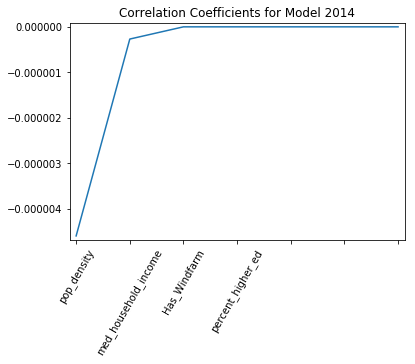

In [63]:
#Plot the coefficients to see which features have highest value
coef_values = model2014[2]
featurescount = len(df.columns) - 1
title = 'Model 2014'

plt = PlotCoefficients(featurescount, coef_values,title)

<div class="span5 alert alert-success">
<p> Using zip codes (count: 21) with 2009 - 2017 housing data available, but only using population density,
    percent higher ed, Has_Windfarm, and median household income in the model</p>
</div>

In [64]:
dfin = pd.read_csv('project1_machine_learning_input_starting_2009.csv')

df = dfin[['pop_density','med_household_income','Has_Windfarm', 'percent_higher_ed','percent_2018_change']]

print('Model 2009 Results with only pop density, median income, has windfarm, and percent higher ed')

model2009b = BuildAndFitModel(lasso, df, 4, 4)

Model 2009 Results with only pop density, median income, has windfarm, and percent higher ed
model score: 0.029795183478338205
model score with cross validation: [-0.01221435 -0.00437783 -0.0021052  -0.00442849 -0.00481776]
model score with cross validation mean: -0.005588725060206759


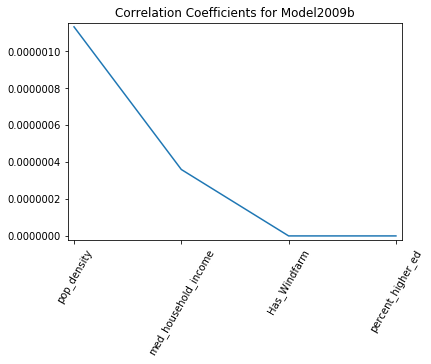

In [65]:
#Plot the coefficients to see which features have highest value
coef_values = model2009b[2]
featurescount = len(df.columns) - 1
title = 'Model2009b'

plt = PlotCoefficients(featurescount, coef_values,title)

<div class="span5 alert alert-success">
<b> Lasso Conclusions </b>
    <p>Using three different test datasets (years 2009 - 2017, years 2014 - 2017, and no housing values) produces almost 
    identical results for the three datasets. <br> <br>
    Lasso appears to produce the best results (mean squared error of 0) of the four algorithms. <br><br>
    The feature contributing the greatest value to the model appears to be population density, followed by median household
    income.
</p>
</div>